In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = 'C:/Users/Gayathri/Desktop/dow_jones_index.data'

# Import file: data
data = pd.read_csv(file, sep=',')





In [4]:
# Create a dataframe
df = pd.DataFrame(data)

Reference: https://people.duke.edu/~rnau/411arim3.htm

In [5]:
# columns in the DF
df.columns

Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend'],
      dtype='object')

In [6]:
df.head(5)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [7]:
df.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.set_index('date', inplace=True)

In [10]:
# Shape of the DF
df.shape

(750, 15)

In [11]:
df.isnull().sum()

quarter                                0
stock                                  0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [12]:
df.stock.value_counts()

KRFT    25
HD      25
BAC     25
CVX     25
IBM     25
WMT     25
DIS     25
MMM     25
UTX     25
TRV     25
MRK     25
JNJ     25
INTC    25
JPM     25
BA      25
PFE     25
HPQ     25
XOM     25
AA      25
VZ      25
T       25
CSCO    25
DD      25
GE      25
KO      25
MCD     25
AXP     25
PG      25
MSFT    25
CAT     25
Name: stock, dtype: int64

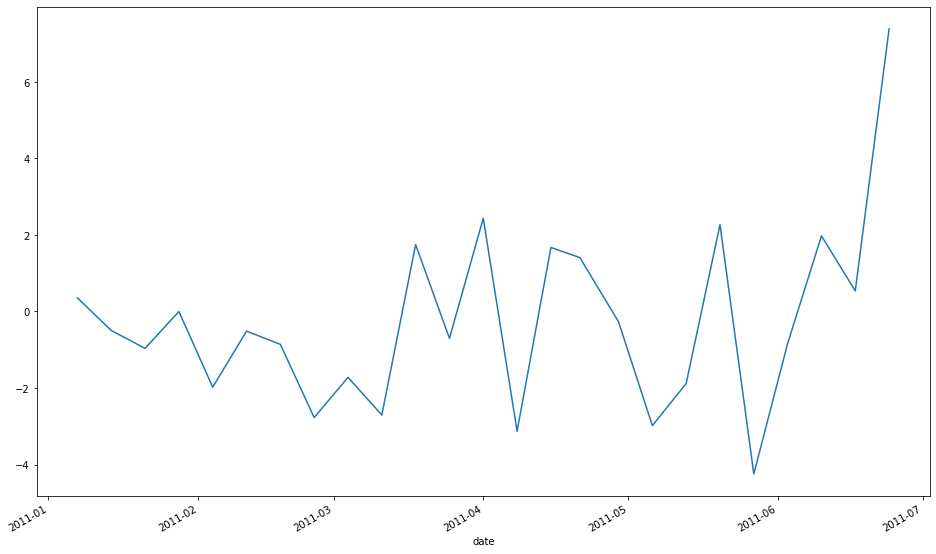

In [13]:
plt.figure(figsize=(16,10))
plt.grid(True)
#sns.lineplot(x=df.index,y='percent_change_next_weeks_price',data=df)
condition = df['stock']=='MSFT' 
df1 = df[condition]
df1.percent_change_next_weeks_price.plot()

plt.show()

<ipython-input-14-0a509e822689>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df1.percent_change_next_weeks_price, freq=10)


<Figure size 432x288 with 0 Axes>

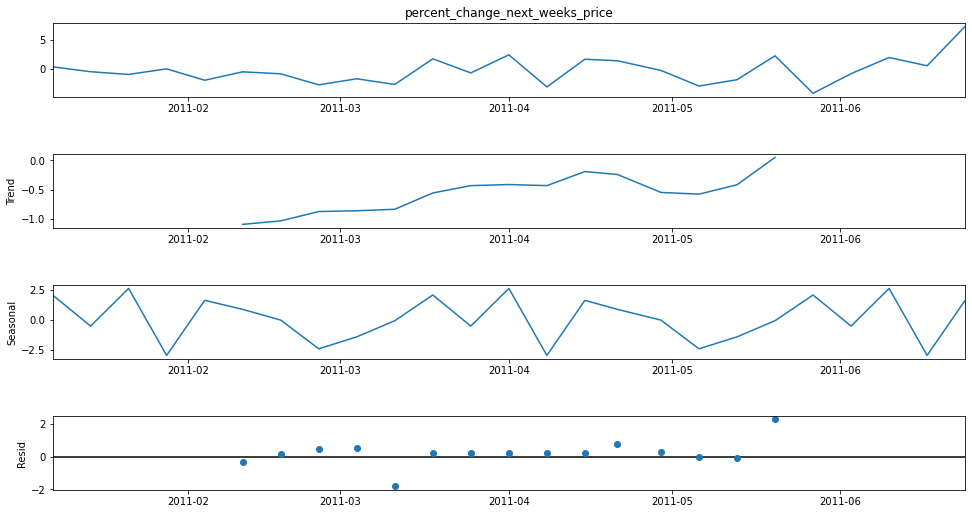

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df1.percent_change_next_weeks_price, freq=10)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

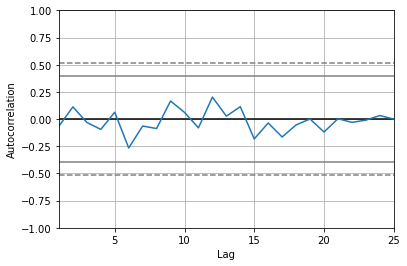

In [15]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['percent_change_next_weeks_price'])
plt.show()

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict


In [17]:
df1['percent_change_next_weeks_price'].autocorr(lag=1)

-0.08692337281628065

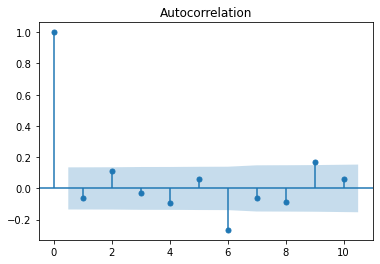

In [18]:
plot_acf(df1['percent_change_next_weeks_price'],alpha=0.5,lags=10)
plt.show()

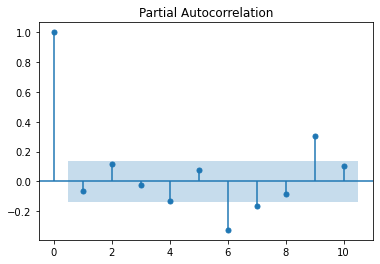

In [19]:
plot_pacf(df1['percent_change_next_weeks_price'],alpha=0.5,lags=10)
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
results = adfuller(df1['percent_change_next_weeks_price'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(-3.973757822173585, 0.00155433146489482, 0, 24, {'1%': -3.7377092158564813, '5%': -2.9922162731481485, '10%': -2.635746736111111}, 76.86062368547289)
The p-value of the test on prices is: 0.00155433146489482


The p-value is extremely small, so we can easily reject the null hypothesis that percentage change next week price is not a random walk.

In [22]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.arima_model import ARIMA

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [96]:


model = ARIMA(df1['percent_change_next_weeks_price'],  order=(1,0,6))
result = model.fit()


In [97]:
print(result.summary())

                                     ARMA Model Results                                    
Dep. Variable:     percent_change_next_weeks_price   No. Observations:                   25
Model:                                  ARMA(1, 6)   Log Likelihood                 -55.233
Method:                                    css-mle   S.D. of innovations              1.857
Date:                             Tue, 07 Sep 2021   AIC                            128.467
Time:                                     18:56:37   BIC                            139.437
Sample:                                          0   HQIC                           131.509
                                                                                           
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3774    

In [98]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

In [99]:
rmse = np.sqrt(mean_squared_error(df1['percent_change_next_weeks_price'], result.fittedvalues))
rmse

2.085578574535733

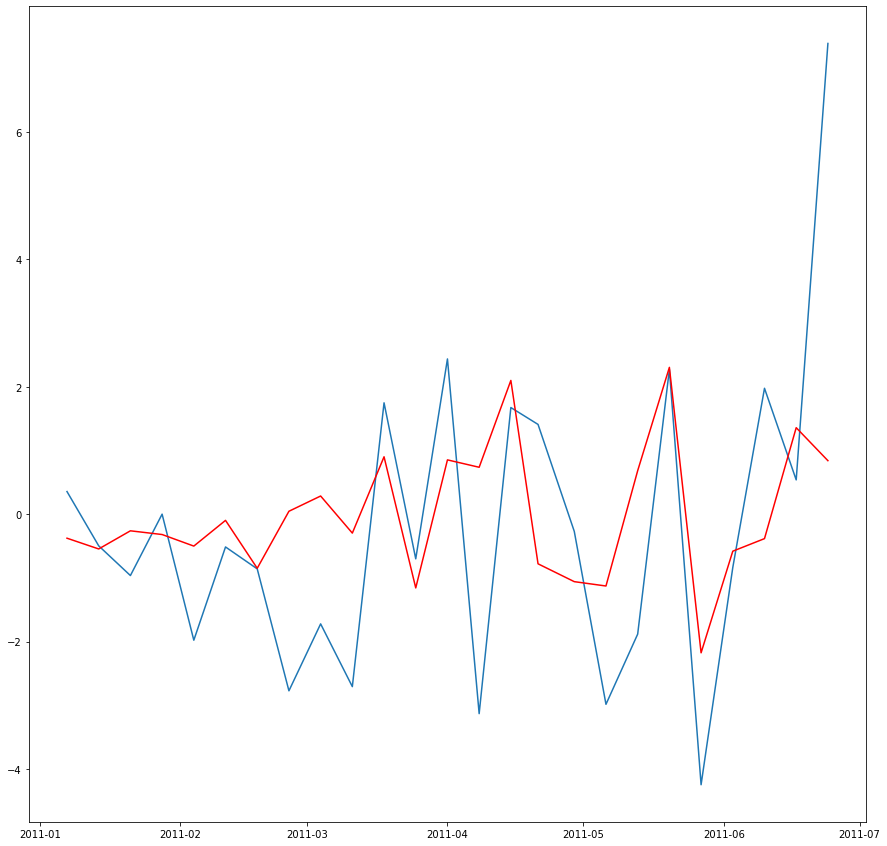

In [100]:
plt.figure(figsize=(15,15))
plt.plot(df1['percent_change_next_weeks_price'])
plt.plot(result.fittedvalues,color='red')

In [87]:
df1.index

DatetimeIndex(['2011-01-07', '2011-01-14', '2011-01-21', '2011-01-28',
               '2011-02-04', '2011-02-11', '2011-02-18', '2011-02-25',
               '2011-03-04', '2011-03-11', '2011-03-18', '2011-03-25',
               '2011-04-01', '2011-04-08', '2011-04-15', '2011-04-21',
               '2011-04-29', '2011-05-06', '2011-05-13', '2011-05-20',
               '2011-05-27', '2011-06-03', '2011-06-10', '2011-06-17',
               '2011-06-24'],
              dtype='datetime64[ns]', name='date', freq=None)

In [101]:
start_index = len(df1['percent_change_next_weeks_price'])
end_index = start_index+7

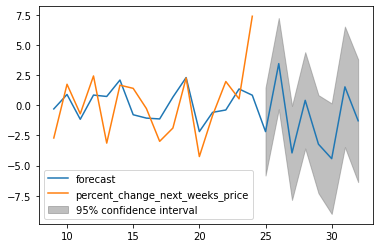

In [102]:
result.plot_predict(start='2011-03-11',end=end_index)
plt.show()